In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

In [3]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

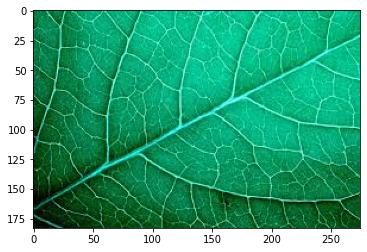

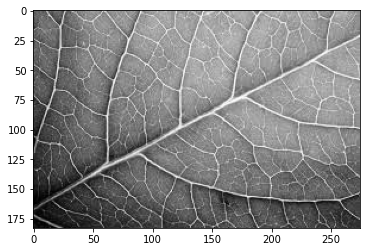

In [13]:
from models.image import Image
from skimage.filters import meijering, sato, frangi, hessian

# load the image
image = Image(path='../data/images/ridgeDetector_test.jpeg')
image.load()
imshow(image.img)
gray = cv2.cvtColor(image.img, cv2.COLOR_BGR2GRAY)
imshow(gray, "gray")

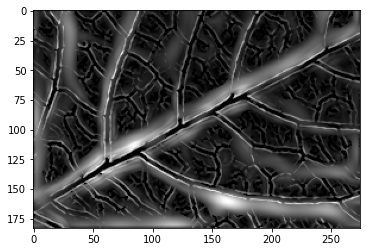

In [14]:
# import your func
# from modules.thresholding import threshHandler
from modules.histogramManipulation import histogramManipulationHandler
from modules.sharpening import sharpenHandler 
from modules.otsuThresholding import OstuThresholdingHandler
from modules.AdaptiveThresholding import adaptiveThresholdingHandler
from modules.averageBlur import averageBlurringHandler
from modules.bilateralBlur import bilateralBlurringHandler
from modules.ridgeDetector import ridgeDetectorHandler


# imshow(threshHandler(image, {'threshold_value': 150}).img, cmap='gray')
# imshow(histogramManipulationHandler(image, {'contrast_limit': 1}).img, cmap='gray')
# imshow(OstuThresholdingHandler(image, {}).img, cmap='gray')
# imshow(adaptiveThresholdingHandler(image, {'threshold_value': 0.75}).img, cmap='gray')
# imshow(sharpenHandler(image, {'kernel_size': 7, 'strength': 0}).img, cmap='gray')
# imshow(averageBlurringHandler(image, {'Blur amount': 5}).img, cmap='gray')
# imshow(bilateralBlurringHandler(image, {}).img, cmap='gray')
imshow(ridgeDetectorHandler(image, {}).img, cmap='gray')